In [1]:
from CNN import CNN, train, test
import torch
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
sizes = [28, 14, 7, 4]
train_data = [None, None, None, None]
loss_data = [None, None, None, None]
test_data = [None, None, None, None]
cnn = [None, None, None, None]

for i in range(len(cnn)):
    cnn[i] = CNN(img_shape = sizes[i])
    

/Users/cristianespinosa/opt/anaconda3/envs/tensor/lib/python3.6/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1631631159818/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
for i in range(len(cnn)):
    start = timeit.default_timer()
    train_data[i], loss_data[i] = train(cnn[i], cnn[i].loaders, 75 + (30*i))
    end = timeit.default_timer()
    time = np.round((end - start) / 60, 2)
    print('training completion time: ', time, 'minutes')
    
    print('\n\n')
    
    start = timeit.default_timer()
    test_data[i] = pd.DataFrame(test(cnn[i], cnn[i].loaders))
    end = timeit.default_timer()
    time = np.round((end - start) / 60, 2)
    print('testing completion time: ', time, 'minutes')
    
    print('\n\nSaving the models...')
    
    model_path = '../models/cnn_model' + str(sizes[i]) + 'x' + str(sizes[i])
    weights_path = '../models/cnn_weights' + str(sizes[i]) + 'x' + str(sizes[i])
    torch.save(cnn[i], model_path)
    torch.save(cnn[i].state_dict(), weights_path)


Done training
training completion time:  34.63 minutes



Done testing
testing completion time:  0.04 minutes


Saving the models...
Done training
training completion time:  23.65 minutes



Done testing
testing completion time:  0.04 minutes


Saving the models...
Done training
training completion time:  28.18 minutes



Done testing
testing completion time:  0.03 minutes


Saving the models...
Done training
training completion time:  29.41 minutes



Done testing
testing completion time:  0.03 minutes


Saving the models...


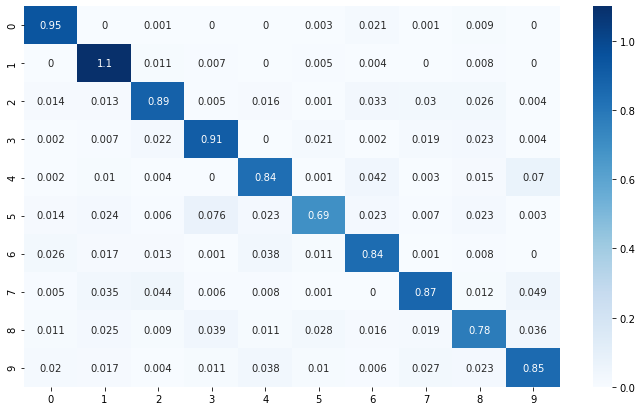

In [10]:
plt.figure(figsize = (12,7))
sn.heatmap(test_data[0], annot=True, cmap='Blues')
plt.savefig('../models/confusion_matrix_28x28.png')

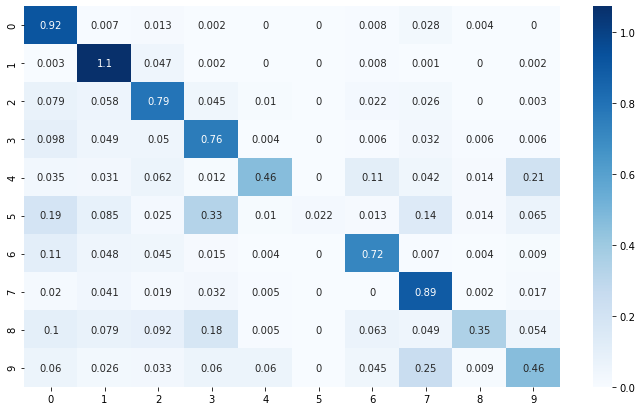

In [9]:
plt.figure(figsize = (12,7))
sn.heatmap(test_data[1], annot=True, cmap='Blues')
plt.savefig('../models/confusion_matrix_14x14.png')

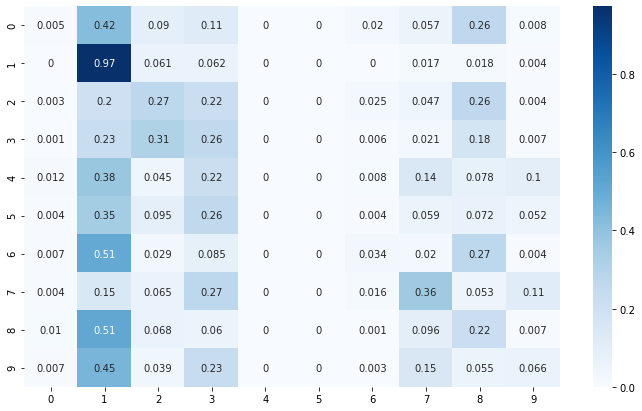

In [11]:
plt.figure(figsize = (12,7))
sn.heatmap(test_data[2], annot=True, cmap='Blues')
plt.savefig('../models/confusion_matrix_7x7.png')

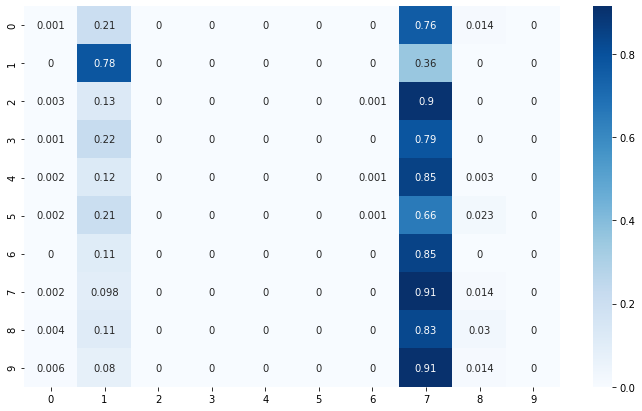

In [12]:
plt.figure(figsize = (12,7))
sn.heatmap(test_data[3], annot=True, cmap='Blues')
plt.savefig('../models/confusion_matrix_4x4.png')

In [13]:
train_data = np.array(train_data)
np.save('../models/cnn_train_acc_data', train_data)

test_data = np.array(test_data)
np.save('../models/cnn_test_acc_data', test_data)

loss_data = np.array(loss_data)
np.save('../models/cnn_loss_data', loss_data)

/Users/cristianespinosa/opt/anaconda3/envs/tensor/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/Users/cristianespinosa/opt/anaconda3/envs/tensor/lib/python3.6/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys
